<center>
<img src='https://blog.adioma.com/wp-content/uploads/2018/11/big-five-personality-traits-infographic.png' width='500'>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

import pylab as pl
# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as mtick

### Table of Contents

* 1. Exploratory Data Analysis

* 2. Big Five personality traits

    * 2.1. Q&As Related to Extroversion Personality
    * 2.2. Q&As Related to Neuroticism Personality
    * 2.3. Q&As Related to Agreeable Personality
    * 2.4. Q&As Related to Conscientious Personality
    * 2.5. Q&As Related to Open Personality
 
* 3. Clustering
    * 3.1 PCA
    * 3.1 K-means
        * 3.2.1 Using elbow method to determine best number of clusters
        * 3.2.2 Using silhouette method to determine best number of clusters
    * 3.3  Analyzing model and predictions


   
    

In [3]:
df = pd.read_csv('dataset.csv', delimiter='\t')
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [4]:
#dropping unnecessary columns for our project

df.drop(df.columns[50:107], axis=1, inplace=True)
df.drop(df.columns[51:], axis=1, inplace=True)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [5]:
#EDA

linebreak = '------------------' 

#Check Shape
print(linebreak*3)
print("Shape: ")
print(df.shape)
print(linebreak*3)
    
#Check Feature Names
print("Column Names: ")
print(df.columns)
print(linebreak*3)
    
#Check types, missing, memory
print("Data Types, Missing Data, Memory: ")
print(df.info())
print(linebreak*3)

------------------------------------------------------
Shape: 
(1015341, 51)
------------------------------------------------------
Column Names: 
Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')
------------------------------------------------------
Data Types, Missing Data, Memory: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3

In [6]:
#Check Missing Values

print('Are there missing values? ', df.isnull().values.any())
print('How many missing values are there? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Are there missing values?  True
How many missing values are there?  89227
Number of participants after eliminating missing values:  1013481


### Big Five Personality Test

In [7]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [8]:
# Defining a function to visualize the questions and answers distribution

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

### Little about the Personalities

<center>
<img src='https://mind.help/wp-content/uploads/2021/10/The-Big-5-Personality-Traits-1.jpg' width='500'>

## 2.1. Extroversion Personality

* Questions:
 
  * EXT1 : I am the life of the party
  * EXT2 : I dont talk a lot
  * EXT3 : I feel comfortable around people
  * EXT4 : I keep in the background
  * EXT5 : I start conversations
  * EXT6 : I have little to say
  * EXT7 : I talk to a lot of different people at parties
  * EXT8 : I dont like to draw attention to myself
  * EXT9 : I dont mind being the center of attention
  * EXT10: I am quiet around strangers

Q&As Related to Extroversion Personality


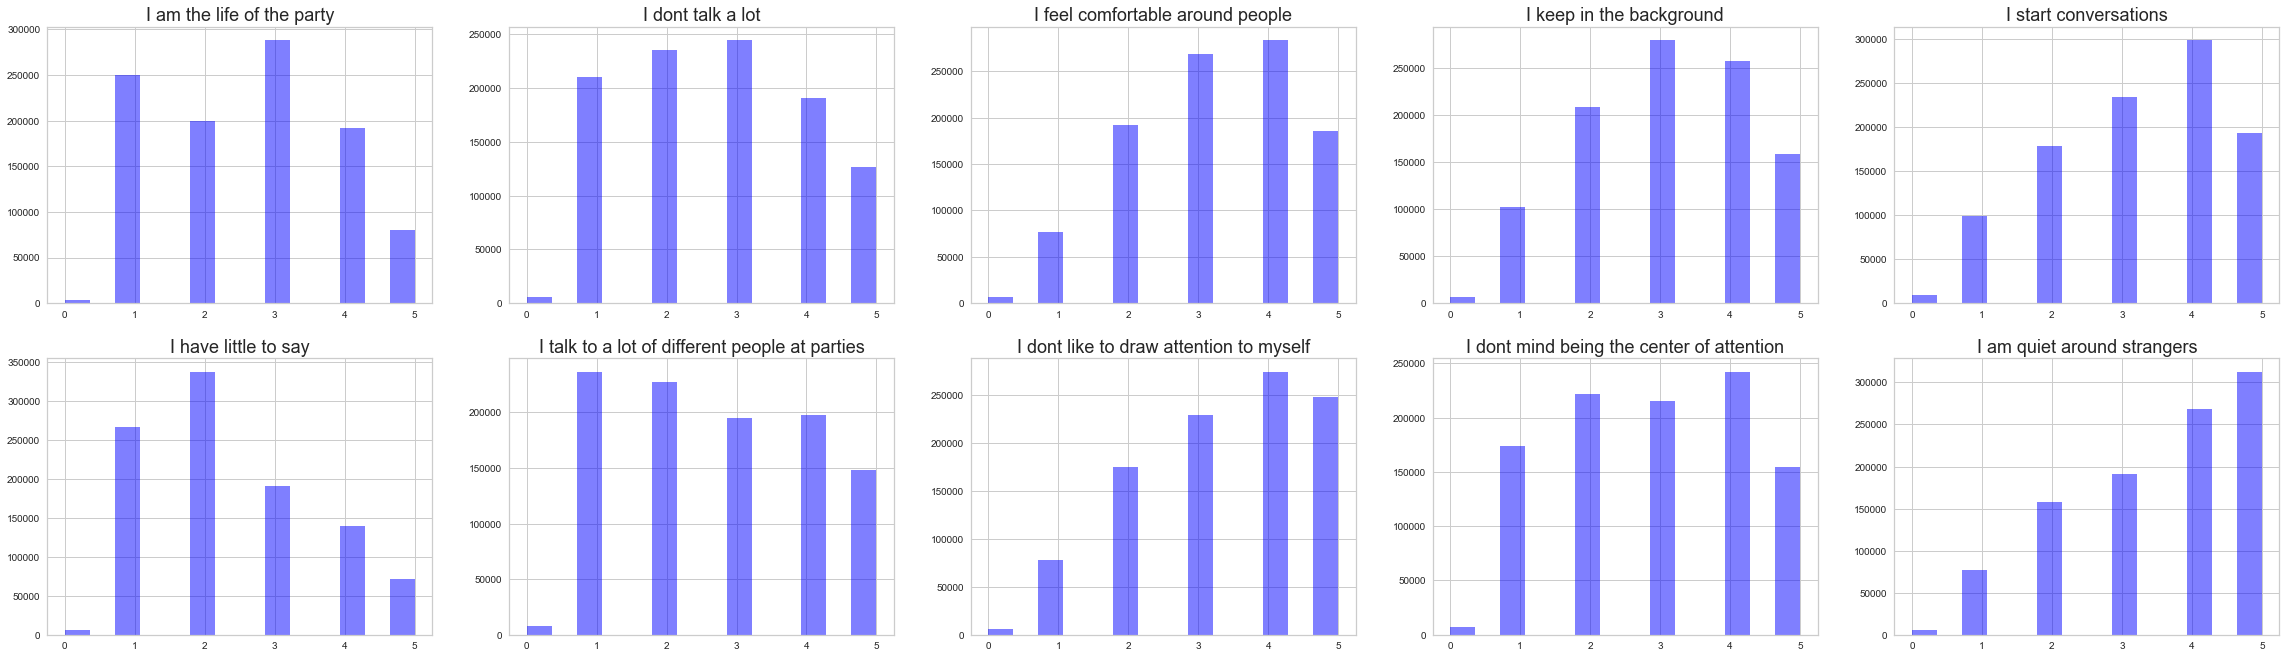

In [9]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'blue')

## 2.2. Q&As Related to Neuroticism Personality

* EST1 : I get stressed out easily,
* EST2 : I am relaxed most of the time,
* EST3 : I worry about things,
* EST4 : I seldom feel blue,
* EST5 : I am easily disturbed,
* EST6 : I get upset easily,
* EST7 : I change my mood a lot,
* EST8 : I have frequent mood swings,
* EST9 : I get irritated easily,
* EST10: I often feel blue

Q&As Related to Neuroticism Personality


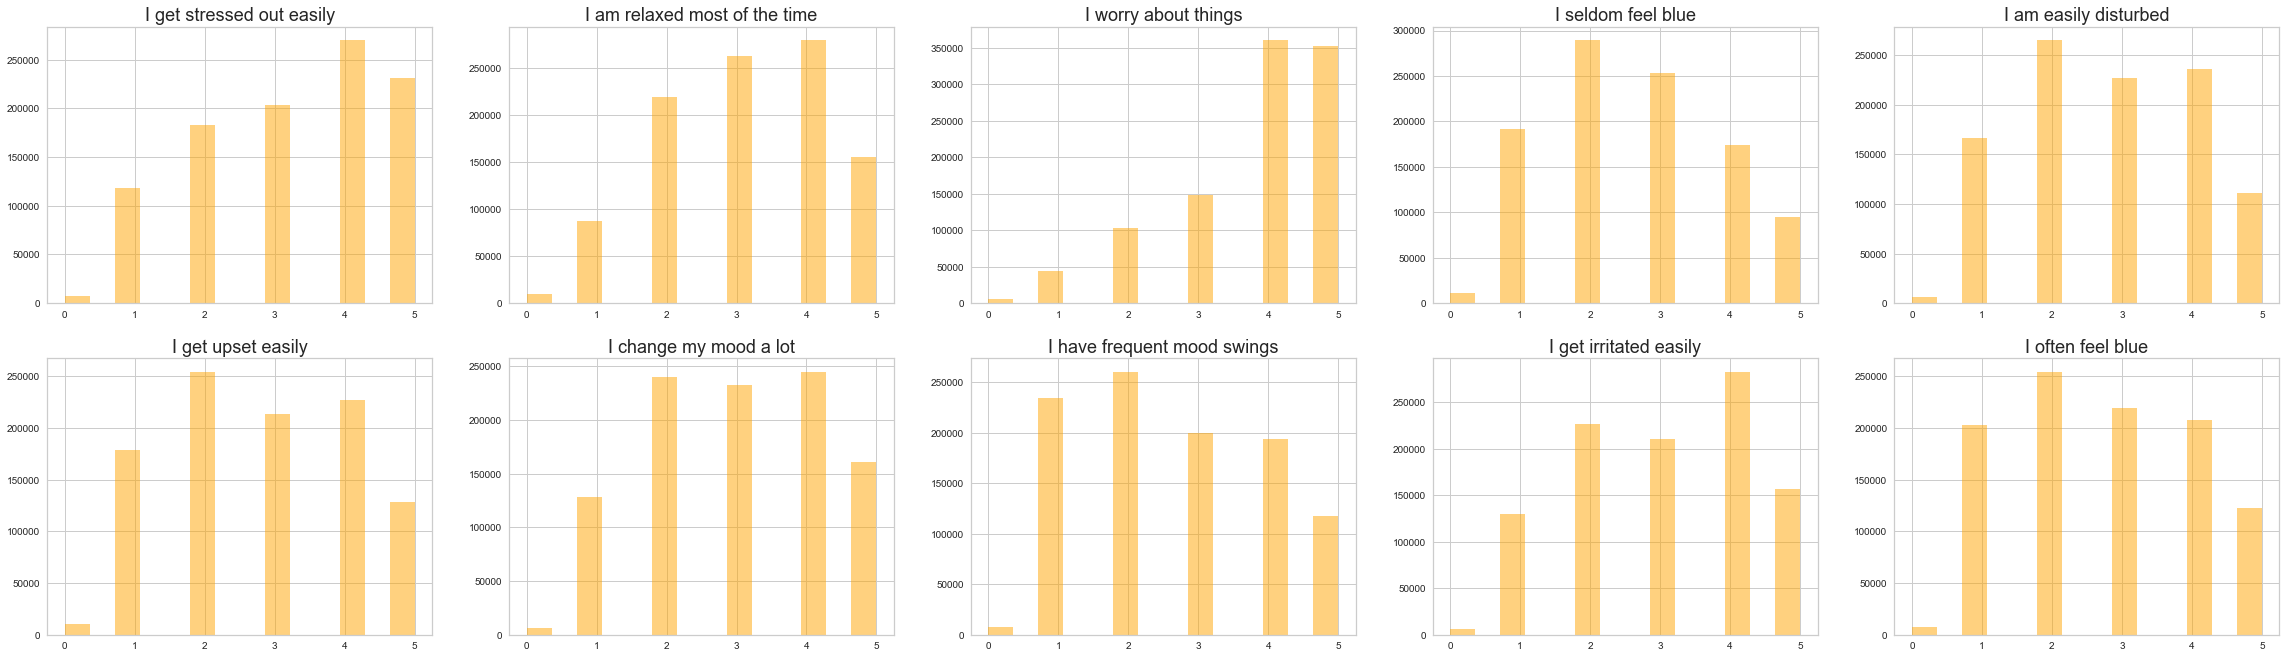

In [10]:
#barplots showing the frequency of each category 

print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'orange')

## 2.3. Q&As Related to Agreeable Personality

* AGR1 : I feel little concern for others,
* AGR2 : I am interested in people,
* AGR3 : I insult people,
* AGR4 : I sympathize with others feelings,
* AGR5 : I am not interested in other peoples problems,
* AGR6 : I have a soft heart,
* AGR7 : I am not really interested in others,
* AGR8 : I take time out for others,
* AGR9 : I feel others emotions,
* AGR10: I make people feel at ease

Q&As Related to Agreeable Personality


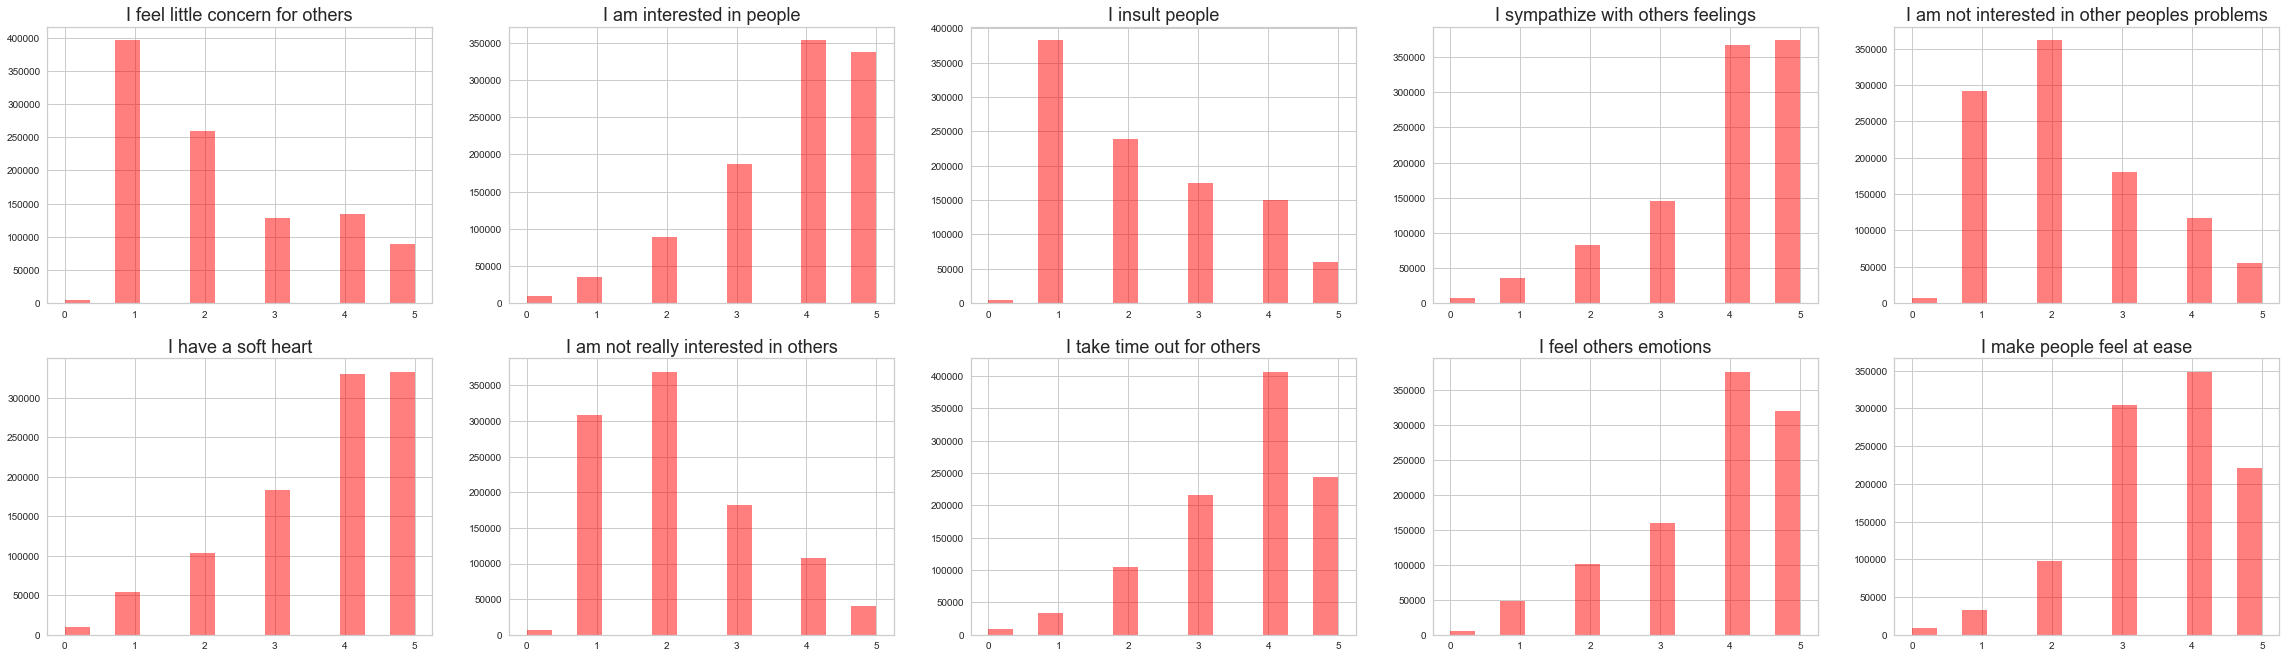

In [11]:
#barplots showing the frequency of each category 

print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

## 2.4. Q&As Related to Conscientious Personality
 
* CSN1 : I am always prepared,
* CSN2 : I leave my belongings around,
* CSN3 : I pay attention to details,
* CSN4 : I make a mess of things,
* CSN5 : I get chores done right away,
* CSN6 : I often forget to put things back in their proper place,
* CSN7 : I like order,
* CSN8 : I shirk my duties,
* CSN9 : I follow a schedule,
* CSN10 : I am exacting in my work

Q&As Related to Conscientious Personality


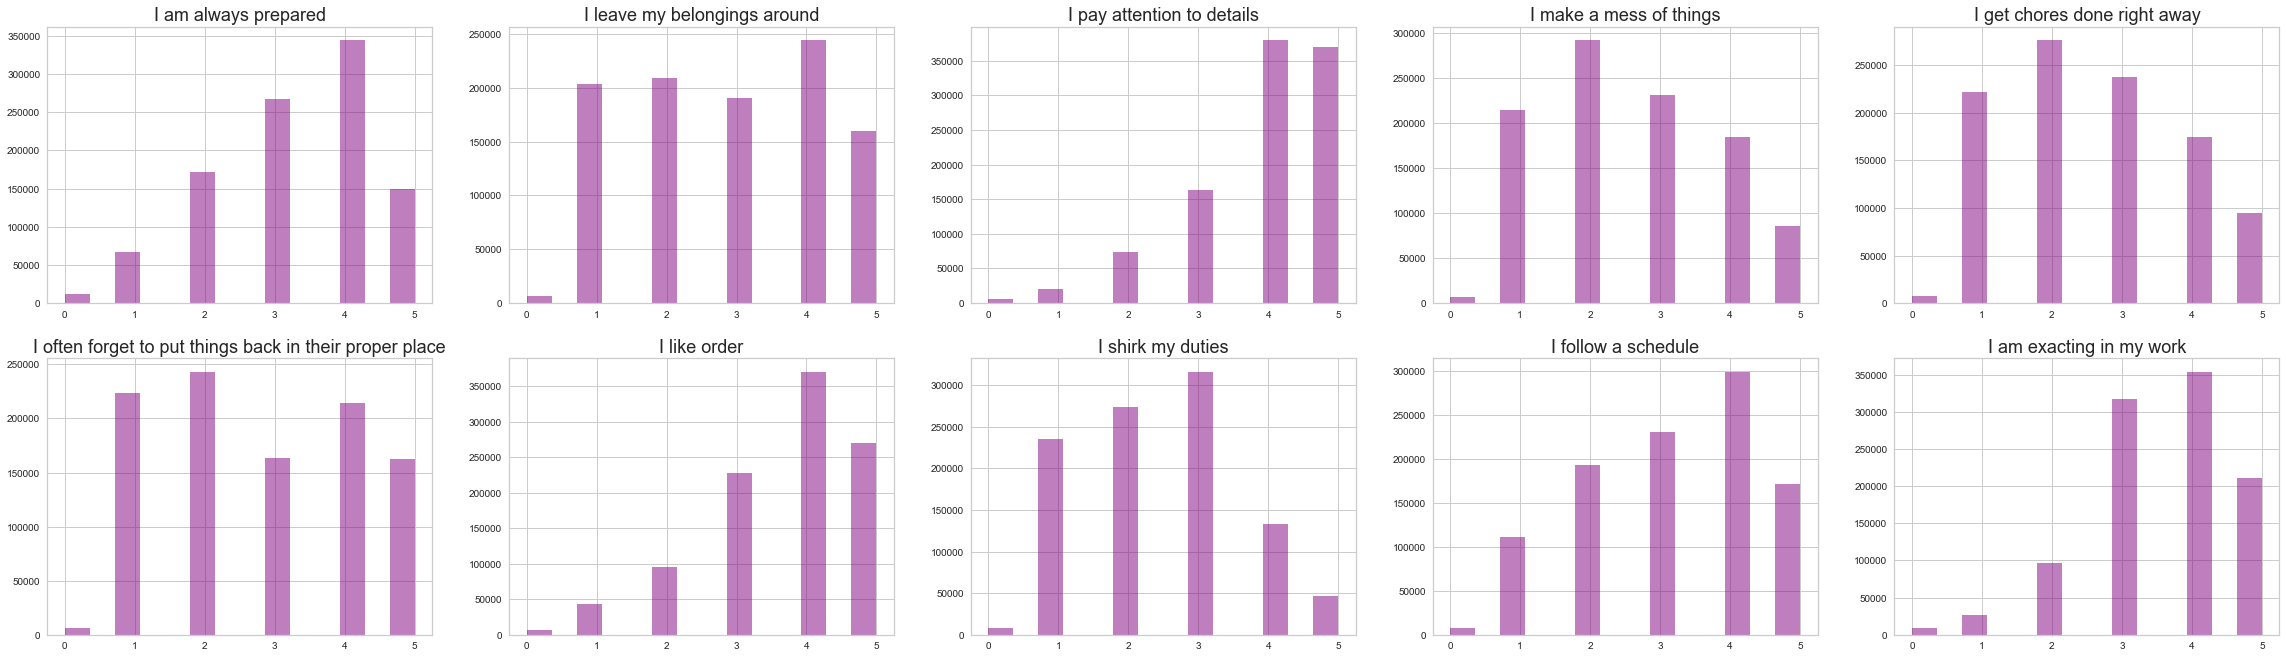

In [12]:
#barplots showing the frequency of each category 

print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

## 2.5. Q&As Related to Open Personality


* OPN1 : I have a rich vocabulary,
* OPN2 : I have difficulty understanding abstract ideas,
* OPN3 : I have a vivid imagination,
* OPN4 : I am not interested in abstract ideas,
* OPN5 : I have excellent ideas,
* OPN6 : I do not have a good imagination,
* OPN7 : I am quick to understand things,
* OPN8 : I use difficult words,
* OPN9 : I spend time reflecting on things,
* OPN10: I am full of ideas

Q&As Related to Open Personality


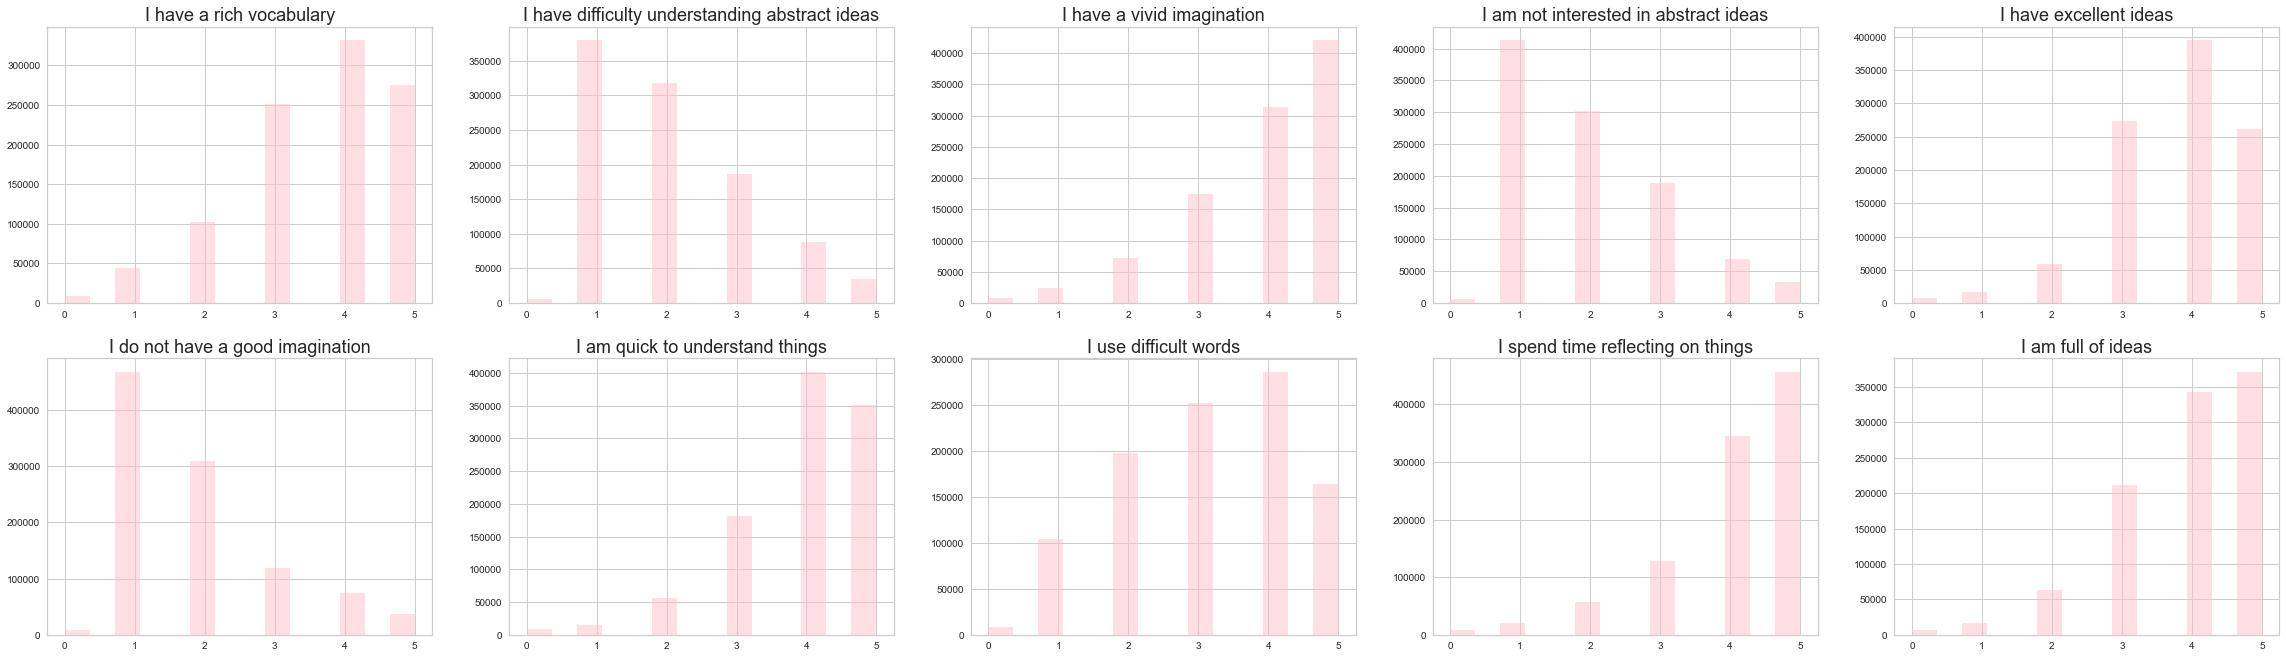

In [13]:
#barplots showing the frequency of each category 

print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'pink')

# 3.Clustering

### We need to check how many clusters to define

In [14]:
# For ease of calculation we will scale all the values between 0-1 and take a sample of 5000 

from sklearn.preprocessing import MinMaxScaler

df = df.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

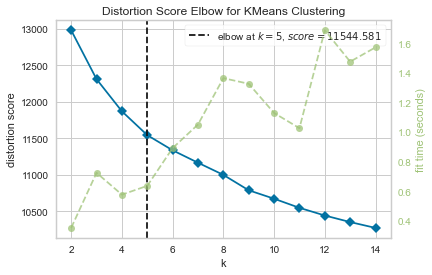

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Visualize the elbow

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

### K-Means

In [16]:
# Creating K-means Cluster Model

from sklearn.cluster import KMeans

df_model = df

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [17]:
# Predicting the Clusters

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,0
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,3
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,3
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,4
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,0


**It is not clear how many clusters look optimum for our dataset, so we have to reduce the dimensions using PCA**

In [18]:
df_model.Clusters.value_counts()

1    226959
3    212616
0    210337
2    199862
4    163707
Name: Clusters, dtype: int64

In [19]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.694432,0.388615,0.867694,0.443736,0.852932,0.333249,0.777231,0.561925,0.748508,0.502960,0.465244,0.763769,0.631642,0.656161,0.423307,0.380484,0.422521,0.335663,0.423697,0.343989,0.378409,0.886488,0.365922,0.849792,0.371114,0.769853,0.317390,0.819695,0.820416,0.839036,0.743486,0.515498,0.838538,0.379310,0.628286,0.455704,0.774351,0.386903,0.716671,0.775129,0.776816,0.351062,0.816417,0.359152,0.831508,0.330999,0.862740,0.646770,0.819250,0.858927
1,0.689333,0.383705,0.757739,0.502142,0.807504,0.366981,0.729655,0.554450,0.751906,0.601273,0.762518,0.585196,0.848913,0.482465,0.657491,0.693664,0.761518,0.691617,0.731490,0.635174,0.431884,0.854225,0.530876,0.836652,0.400346,0.799819,0.371804,0.779413,0.826261,0.768760,0.591524,0.720706,0.768325,0.647231,0.447292,0.704303,0.691999,0.565616,0.589429,0.695897,0.747642,0.423697,0.849368,0.393438,0.791226,0.354494,0.792304,0.674762,0.837973,0.839938
2,0.361782,0.725737,0.445974,0.810806,0.456398,0.639143,0.348508,0.813534,0.435368,0.894814,0.849674,0.492036,0.900435,0.429271,0.711520,0.771641,0.797766,0.751891,0.801303,0.786170,0.500677,0.665570,0.521420,0.760111,0.517836,0.763923,0.549205,0.680921,0.728269,0.608663,0.560821,0.671188,0.762235,0.695386,0.418420,0.700121,0.711875,0.609221,0.555217,0.661341,0.699856,0.476747,0.812179,0.427901,0.686402,0.417797,0.735409,0.635531,0.854898,0.744170
3,0.423412,0.662617,0.617378,0.733922,0.589951,0.542468,0.439455,0.801282,0.464036,0.827998,0.699783,0.616616,0.830113,0.521707,0.563577,0.556785,0.572898,0.485220,0.593986,0.541810,0.377370,0.786573,0.338376,0.869926,0.398159,0.828243,0.404040,0.795918,0.834139,0.743262,0.766676,0.446810,0.859487,0.404585,0.646739,0.416081,0.832601,0.403625,0.765581,0.778074,0.715322,0.427067,0.779086,0.412183,0.745569,0.393195,0.802171,0.597445,0.853272,0.763065
4,0.439282,0.655690,0.559905,0.679188,0.518657,0.551157,0.425475,0.703542,0.531293,0.755860,0.467502,0.724718,0.596664,0.584586,0.464184,0.402068,0.460260,0.384335,0.515825,0.447992,0.606143,0.586166,0.516006,0.553341,0.630506,0.528224,0.600236,0.569348,0.519498,0.595685,0.627721,0.566963,0.732635,0.482282,0.473070,0.549193,0.674230,0.503190,0.552895,0.667115,0.706983,0.395201,0.722827,0.411567,0.724620,0.408378,0.776842,0.622099,0.738682,0.733585


In [20]:
# Summing up the different questions groups

col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extraversion'] = df_model[ext].sum(axis=1)/10
data_sums['neuroticism'] = df_model[est].sum(axis=1)/10
data_sums['agreeableness'] = df_model[agr].sum(axis=1)/10
data_sums['conscientiousness'] = df_model[csn].sum(axis=1)/10
data_sums['openness'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
df_cluster = data_sums.groupby('clusters').mean()
df_cluster

,extraversion,neuroticism,agreeableness,conscientiousness,openness
clusters,,,,,
0,0.617128,0.484648,0.641812,0.621388,0.665364
1,0.614469,0.685005,0.660004,0.642232,0.670484
2,0.593207,0.729171,0.629660,0.634583,0.649089
3,0.610252,0.598249,0.637601,0.632026,0.648838
4,0.582005,0.504813,0.570515,0.582930,0.624078


## 3.1 PCA (Principal Component Analysis)

PCA is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [21]:
# In order to visualize in 2D graph and improve our prediction results, we will use PCA to reduce dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])

df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-2.129076,0.530054,0
1,1.175940,0.410718,3
2,1.102052,0.464200,3
3,2.061379,0.076922,4
4,-1.932983,0.840720,0


## 3.2 K-means Clustering

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

3.2.1 Using elbow method to determine best number of clusters

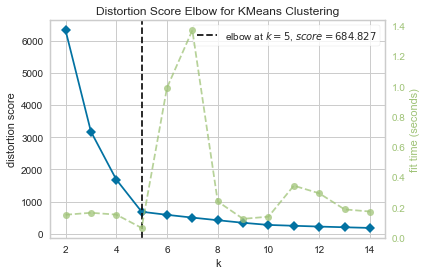

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Visualize the elbow to check best number of clusters using 5000 samples

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_pca[5000:10000])
visualizer.poof()

The elbow method shows that 5 is the best number of clusters. We will go ahead to double-check using the silhouette score

3.2.2 Using silhouette method to determine best number of clusters

For n_clusters = 2 , The average silhouette_score is : 0.6164135983240296
For n_clusters = 3 , The average silhouette_score is : 0.5991588703756621
For n_clusters = 4 , The average silhouette_score is : 0.6650420944516607
For n_clusters = 5 , The average silhouette_score is : 0.729677856291679
For n_clusters = 6 , The average silhouette_score is : 0.6750051403646212
For n_clusters = 7 , The average silhouette_score is : 0.6434067004941835
For n_clusters = 8 , The average silhouette_score is : 0.5961990672053478
For n_clusters = 9 , The average silhouette_score is : 0.5515554133007344
For n_clusters = 10 , The average silhouette_score is : 0.5056048558497841


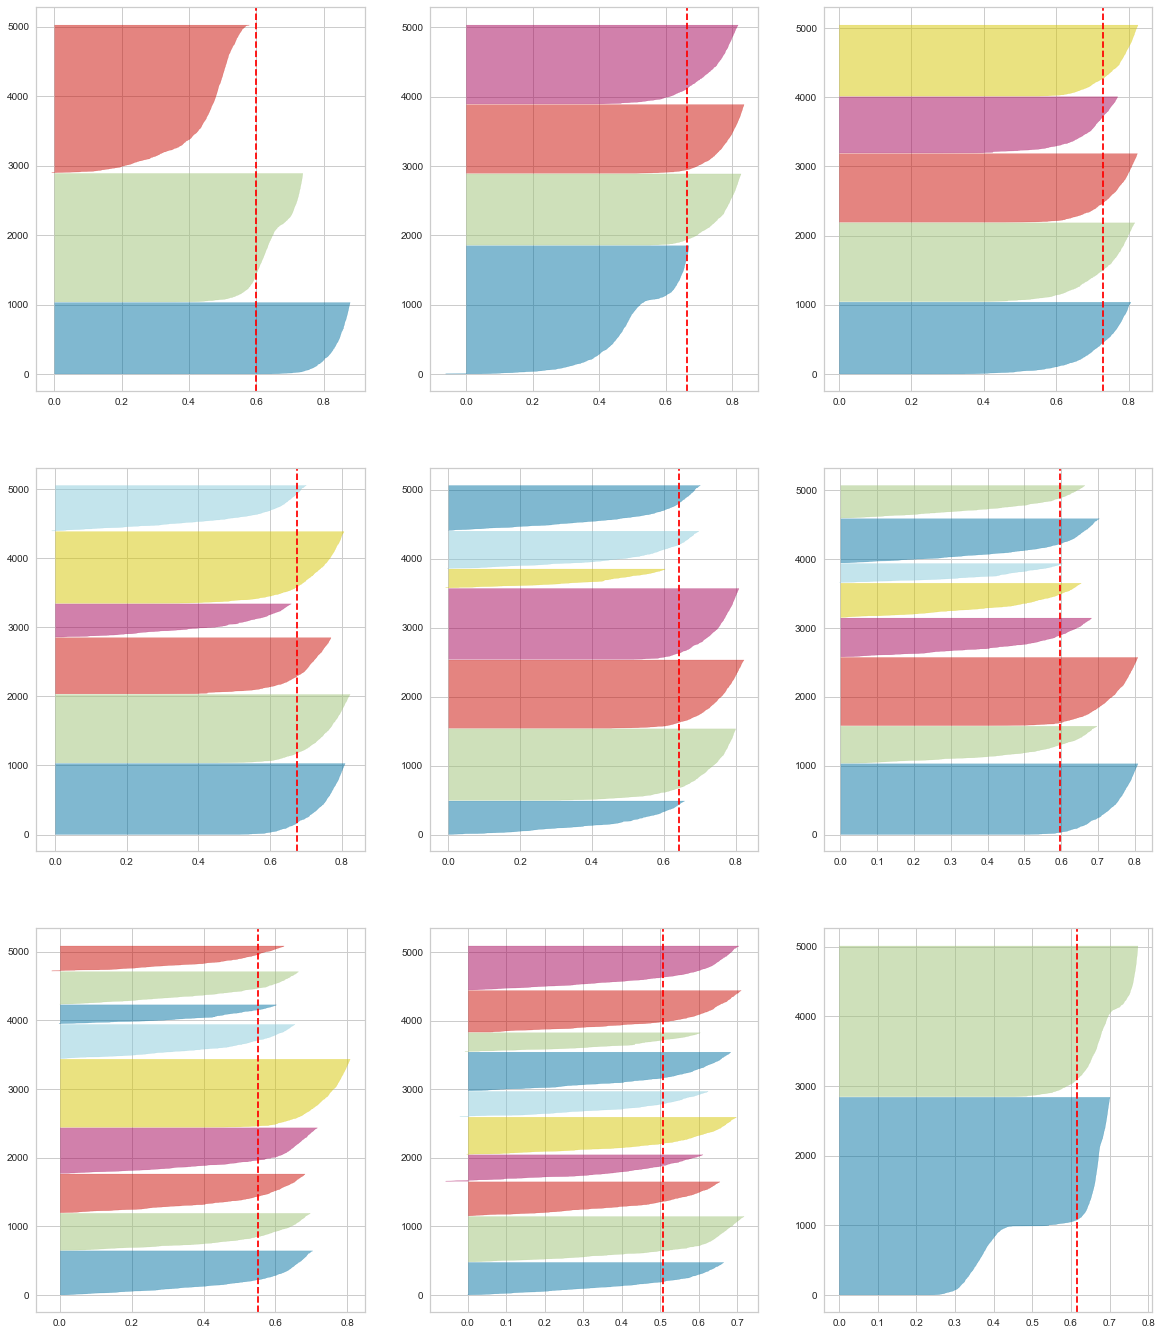

In [23]:
# Using silhouette score to check best number of clusters using 5000 samples

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

range_n_clusters = [2,3,4,5,6,7,8,9,10]
#fit model
fig, ax = plt.subplots(3, 3 , figsize=(20,24))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    k_fit = kmeans.fit_predict(df_pca[5000:10000])
    silhouette_avg = silhouette_score(df_pca[5000:10000], k_fit, metric='euclidean')
    print("For n_clusters =", n_clusters,
                  ", The average silhouette_score is :", silhouette_avg)
    q, mod = divmod(n_clusters, 3)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca[5000:10000])

The silhoutte plot also shows that 5 clusters is the best for our model with score 0.82 which is closest to 1. We can now go ahead to model our data

In [24]:
# Creating K-means Cluster Model

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_pca)

In [25]:
# Predicting the Clusters

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-2.129076,0.530054,0
1,1.175940,0.410718,1
2,1.102052,0.464200,1
3,2.061379,0.076922,4
4,-1.932983,0.840720,0


### 3.3  Analyzing model and predictions

How many individuals are present for each cluster

In [26]:
df_pca.Clusters.value_counts()

2    226959
1    212616
0    210337
3    199862
4    163707
Name: Clusters, dtype: int64

In [27]:
# Summing up the different questions groups

col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extraversion'] = df[ext].sum(axis=1)/10
data_sums['neuroticism'] = df[est].sum(axis=1)/10
data_sums['agreeableness'] = df[agr].sum(axis=1)/10
data_sums['conscientiousness'] = df[csn].sum(axis=1)/10
data_sums['openness'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
df_cluster = data_sums.groupby('clusters').mean()
df_cluster

,extraversion,neuroticism,agreeableness,conscientiousness,openness
clusters,,,,,
0,0.617128,0.484648,0.641812,0.621388,0.665364
1,0.610252,0.598249,0.637601,0.632026,0.648838
2,0.614469,0.685005,0.660004,0.642232,0.670484
3,0.593207,0.729171,0.629660,0.634583,0.649089
4,0.582005,0.504813,0.570515,0.582930,0.624078


Text(0.5, 1.0, 'Personality Clusters after PCA')

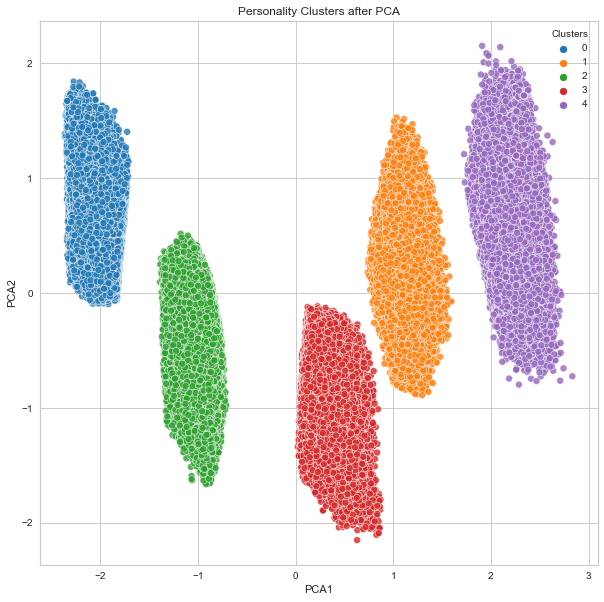

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA')

The results show how separated our clusters are and shows that they can be used to predict the big 5 personalities

## Implementing the model to predict my personality cluster

In [31]:
my_data = pd.read_excel('input_data.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,...,1,5,2,5,5


In [ ]:
my_personality = k_fit.predict(my_data)

print('My Personality Cluster: ', my_personality)

In [ ]:
# Summing up my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums